<a href="https://colab.research.google.com/github/anisaAnya/coursework/blob/master/Refactored_22_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow.compat.v1 as tf

LENGTH_OF_DATA_QUERY = 8
INITIAL_LEARNING_RATE = 0.001
NUMBER_OF_NEURONS_IN_FIRST_LAYER = sum(range(LENGTH_OF_DATA_QUERY))
NUMBER_OF_LAYERS = 18

WEIGHTS_NUMBER = 6
INPUT_NUMBER = 2


class NonLinearAdaline:
    def __init__(self, input_list=None, prev_weights=None):
        if input_list is None:
            self.input = tf.placeholder(tf.float32, INPUT_NUMBER)
            self.prev_weights = []
        else:
            self.input = input_list
            self.prev_weights = []
        self.extended_input = self.calc_extended_input(self)
        self.weights = tf.Variable(tf.truncated_normal([WEIGHTS_NUMBER], mean=0, stddev=1 / np.sqrt(WEIGHTS_NUMBER)),
                                   name='weights', trainable=True)
        self.weighted_input = tf.multiply(self.extended_input, self.weights)
        self.output = tf.reduce_sum(self.weighted_input)

    @staticmethod
    def calc_extended_input(self):
        return [
            self.input[0],
            self.input[0] * self.input[0],
            self.input[0] * self.input[1],
            self.input[1] * self.input[1],
            self.input[1],
            1
        ]


In [0]:
from math import sin, cos, factorial

class DataGenerator:
    def __init__(self, starting_point):
        self.lastpoint = 0
        self.secondlastpoint = 0
        self.starting_point = starting_point
        self.length_of_query = LENGTH_OF_DATA_QUERY
        self.points = self.calculate_data_points(self, starting_point, LENGTH_OF_DATA_QUERY)
        self.target_point = self.calculate_target_point(self, starting_point, LENGTH_OF_DATA_QUERY)
        self.a = 0
        self.b = 1

    @staticmethod
    def calculate_target_point(self, starting_point, length_of_query):
        return self.calculate_next_point(self, starting_point+length_of_query)

    @staticmethod
    def calculate_data_points(self, starting_point, length_of_query):
        return [self.calculate_next_point(self, i) for i in range(starting_point, starting_point + length_of_query)]
    
    @staticmethod
    def calculate_next_point(self, x):
        def f(self, x):
            res = sin(i) * cos(i) ** 3 + cos(i)
            self.secondlastpoint = self.lastpoint
            self.lastpoint = res
            return res
        def f1(self, x):
            res = (0.6*sin(x) + 0.3*sin(x*3) + 0.1*sin(5*x)) + 0.3*self.lastpoint + 0.6*self.secondlastpoint
            self.secondlastpoint = self.lastpoint
            self.lastpoint = res
            return res
        return f1(self, x)

    def get_first_point(self):
        if self.b == LENGTH_OF_DATA_QUERY:
            self.a += 1
            self.b = self.a + 1
        return self.points[self.a]

    def get_second_point(self):
        b = self.b
        self.b += 1
        return self.points[b]
        
    def get_data_points(self):
        return self.points

    def get_target_point(self):
        return self.target_point

    def shift_window(self):
        self.starting_point += 1
        self.target_point = self.calculate_target_point(self, self.starting_point, self.length_of_query)
        self.points = self.calculate_data_points(self, self.starting_point, self.length_of_query)
        self.a = 0
        self.b = 1

In [0]:
class AvgCalculator:
    def __init__(self):
      self.counter = 0
      self.loss_sum = []

    def add_loss(self, loss):
      self.counter += 1
      if len(self.loss_sum) != 0:
          for i in range(0, len(self.loss_sum)):
              self.loss_sum[i] = self.loss_sum[i]+loss[i]
      else:
          self.loss_sum = loss
          self.counter = 1

    def get_n_best_indeces(self, n):
        sorted_loss = self.sort_loss(self.loss_sum)
        indeces = []
        for a in range(0, n):
          for i in range(0, len(sorted_loss)):
            if sorted_loss[a] == self.loss_sum[i]:
                indeces.append(i)
        self.avg_loss = [loss/self.counter for loss in sorted_loss]
        print('Avg loss:',self.avg_loss)
        self.loss_sum = []
        return indeces

    def sort_loss(self, loss):
        if len(loss) == 1:
            return loss
        middle = int((len(loss)) / 2)
        left = self.sort_loss(loss[:middle])
        right = self.sort_loss(loss[middle:])
        merged = self.merge(left, right)
        return merged
    def get_loss(self):
        return self.loss_sum
        
    def merge(self, left, right):
        length = len(left) + len(right)
        res = []
        for i in range(0, length - 1):
            if left[0] > right[0]:
                res.append(right.pop(0))
            else:
                res.append(left.pop(0))
            if len(right) == 0 or len(left) == 0:
                res = res + right + left
                break
        return res 

In [0]:
class NeuralNet:
    def __init__(self):
        self.input_layer = [NonLinearAdaline() for i in range(0, NUMBER_OF_NEURONS_IN_FIRST_LAYER)]
        self.target_point = tf.placeholder(tf.float32)
        self.learning_rate = tf.placeholder(tf.float32)
        self.layers = []
        self.current_layer = 0
        self.layers.append(self.input_layer)
        self.output_layer = self.input_layer
        self.create_training_tensors()

    def create_training_tensors(self):
        self.loss = [((neuron.output - self.target_point) ** 2) / 2 for neuron in self.output_layer]
        self.training_step = self.create_training_step()

    def create_training_step(self):
        training_steps = []
        for i in range(0, len(self.loss)):
            training_steps.append(tf.train.AdamOptimizer(self.learning_rate)
                                  .minimize(self.loss[i], var_list=self.output_layer[i].weights))
        return training_steps

    def create_new_layer(self, indecies):
        self.a = 0
        self.b = 1
        input_list = []
        for i in indecies:
            input_list.append(self.layers[self.current_layer][i])
        self.layers[self.current_layer] = input_list
        new_number_of_neurons = sum(range(len(indecies)))
        neurons = []
        print('N best',len(indecies))
        print('new number',new_number_of_neurons)
        for i in range(0, new_number_of_neurons):
            if self.b == len(self.output_layer):
                self.b = self.a + 2
                self.a += 1
            prev_weights = self.output_layer[self.a].prev_weights+[self.output_layer[self.a].weights]+self.output_layer[self.b].prev_weights+[self.output_layer[self.b].weights]
            neurons.append(NonLinearAdaline(tf.stack([self.output_layer[self.a].output, self.output_layer[self.b].output], 0)))
            self.b += 1
        self.output_layer = neurons
        print('Outputlayer len', len(self.output_layer))
        self.create_training_tensors()
        self.current_layer += 1
        self.layers.append(neurons)
        print('another layer created')

    

In [127]:
from numpy import *
from matplotlib.pyplot import *

min_point = -0.6573386234540067
def normalize_data(point):
    normalized = (point - min_point) / (-min_point - min_point)
    return normalized 

def denormalize_data(point):
    restored = point*(-min_point - min_point) + min_point
    return restored    
    
target_sequence = []
predicted_sequence2 = []
def save_data_for_ploting(sess, feeds, network_instance):
    target_sequence.append(denormalize_data(feeds[network_instance.target_point]))
    res = sess.run([neuron.output for neuron in network_instance.output_layer], feeds)
    predicted_sequence2.append(denormalize_data(res[0]))

def get_weights_list(network_instance):
    i = 0
    weights_list = []
    for layer in network_instance.layers:
        for neuron in layer:
             weights_list.append(neuron.weights)
    #print('All weights', weights_list)
    return weights_list

with tf.Graph().as_default():
    with tf.Session() as sess:
        data = DataGenerator(0)
        avg_calc = AvgCalculator()
        network_instance = NeuralNet()
        sess.run(tf.global_variables_initializer())
        a = 1
        while a <= NUMBER_OF_LAYERS:
            a += 1
            sum_loss = None
            for i in range(0, 4000):
                feeds = {}
                for neuron in network_instance.input_layer:
                    feeds[neuron.input] = [normalize_data(data.get_first_point()), normalize_data(data.get_second_point())]

                feeds[network_instance.learning_rate] = INITIAL_LEARNING_RATE
                feeds[network_instance.target_point] = normalize_data(data.get_target_point())
                _, loss = sess.run([network_instance.training_step, network_instance.loss], feeds)
                avg_calc.add_loss(loss)
                save_data_for_ploting(sess, feeds, network_instance)
                data.shift_window()
            print(sess.run(network_instance.input_layer[0].weights))
            all_neurons_list = get_weights_list(network_instance)
            saver = tf.train.Saver(all_neurons_list)
            saver.save(sess, 'my_test_model')
            network_instance.create_new_layer(avg_calc.get_n_best_indeces(len(network_instance.input_layer) - 10 - network_instance.current_layer))
            sess.run(tf.global_variables_initializer())
            new_saver = tf.train.import_meta_graph('my_test_model.meta')
            new_saver.restore(sess, tf.train.latest_checkpoint('./'))
            print(sess.run(network_instance.input_layer[0].weights))

KeyboardInterrupt: ignored

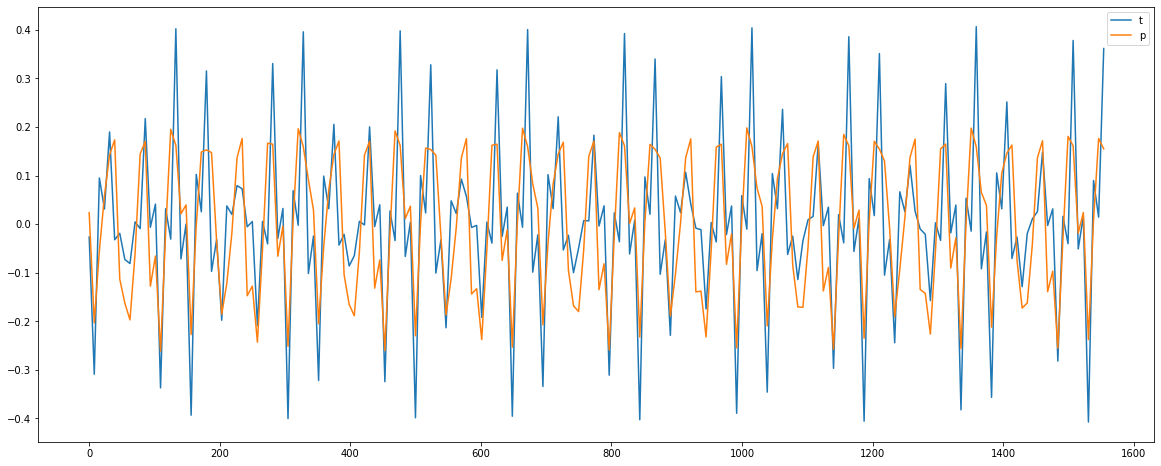

In [130]:
leng = len(predicted_sequence2)
window = 200
shift = 0

fig_size = rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
rcParams["figure.figsize"] = fig_size

t = linspace(0, leng, window)
plot(t, target_sequence[leng-window-shift:leng-shift])
plot(t, predicted_sequence2[leng-window-shift:leng-shift])
#print(target_sequence)
legend(['t', 'p'])
#savefig('tmp2.png')

In [115]:
sum(range(8))

28